In [1]:
import pandas 

import numpy

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import *
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

        

Using TensorFlow backend.


In [3]:
df = pd.read_excel("Covid-19_healthy.xlsx")

In [4]:
df.head()

,Mean3,Std3,sensor_response3,Peak_height3,peak_time3,area3,Kurtosis3,Skew3,Moment3,Variation3,...,Target,Male,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,50 to 54,55 to 59,60 to 64
0,2.710114,1.304940,4.421163,4.047236,51.5,160.356956,-1.284998,-0.564436,-0.663434,0.515013,...,0,1,0,0,0,0,0,0,1,0
1,0.292668,0.091429,0.454085,0.402403,49.0,17.307178,-1.080748,-0.447457,-0.000588,0.309783,...,0,0,0,0,0,1,0,0,0,0
2,1.171990,0.460290,1.846468,1.458157,34.0,69.313713,-1.337642,-0.137721,-0.002620,0.389455,...,0,1,0,0,0,1,0,0,0,0
3,0.249905,0.110419,0.367350,0.367350,44.0,14.853111,0.149621,-1.199994,-0.001575,0.438148,...,0,1,0,0,0,1,0,0,0,0
4,0.286903,0.098612,0.398027,0.350984,44.5,17.012703,-0.086917,-0.976228,-0.000916,0.420685,...,0,1,0,0,0,0,0,0,0,1


In [5]:
y = df["Target"]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1    19
0    11
Name: Target, dtype: int64

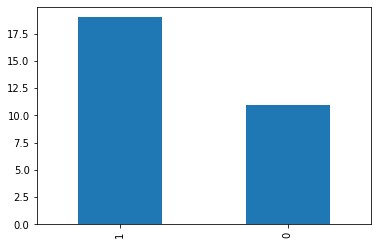

In [7]:

df['Target'].value_counts().plot.bar()
df['Target'].value_counts()

In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [9]:
for i in df.head(1).values:
    print(df.columns)
    print(i)

Index(['Mean3', 'Std3', 'sensor_response3', 'Peak_height3', 'peak_time3',
       'area3', 'Kurtosis3', 'Skew3', 'Moment3', 'Variation3', 'IQR3',
       'Entropy3', 'Power_divergance3', 'Jarque_bera3', 'Mean2', 'Std2',
       'sensor_response2', 'Peak_height2', 'peak_time2', 'area2', 'Kurtosis2',
       'Skew2', 'Moment2', 'Variation2', 'IQR2', 'Entropy2',
       'Power_divergance2', 'Jarque_bera2', 'Mean1', 'Std1',
       'sensor_response1', 'Peak_height1', 'peak_time1', 'area1', 'Kurtosis1',
       'Skew1', 'Moment1', 'Variation1', 'IQR1', 'Entropy1',
       'Power_divergance1', 'Jarque_bera1', 'Blood oxygen level', 'Pulse Rate',
       'Systolic Blood pressure value', 'Diastolic Blood pressure value',
       'Target', 'Male', '20 to 24', '25 to 29', '30 to 34', '35 to 39',
       '40 to 44', '50 to 54', '55 to 59', '60 to 64'],
      dtype='object')
[ 2.71011426e+00  1.30494050e+00  4.42116284e+00  4.04723634e+00
  5.15000000e+01  1.60356956e+02 -1.28499838e+00 -5.64436271e-01
 -6.63

In [10]:
def remove_outlier(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].mean()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y


In [11]:
for i in df:
    remove_outlier(df,i)

In [12]:
x = df.drop(columns= "Target")

In [13]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

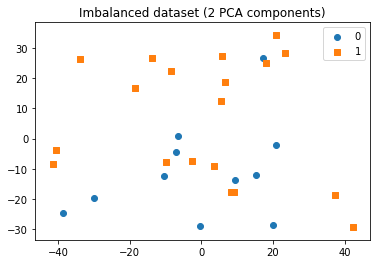

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(x)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [15]:
x.columns

Index(['Mean3', 'Std3', 'sensor_response3', 'Peak_height3', 'peak_time3',
       'area3', 'Kurtosis3', 'Skew3', 'Moment3', 'Variation3', 'IQR3',
       'Entropy3', 'Power_divergance3', 'Jarque_bera3', 'Mean2', 'Std2',
       'sensor_response2', 'Peak_height2', 'peak_time2', 'area2', 'Kurtosis2',
       'Skew2', 'Moment2', 'Variation2', 'IQR2', 'Entropy2',
       'Power_divergance2', 'Jarque_bera2', 'Mean1', 'Std1',
       'sensor_response1', 'Peak_height1', 'peak_time1', 'area1', 'Kurtosis1',
       'Skew1', 'Moment1', 'Variation1', 'IQR1', 'Entropy1',
       'Power_divergance1', 'Jarque_bera1', 'Blood oxygen level', 'Pulse Rate',
       'Systolic Blood pressure value', 'Diastolic Blood pressure value',
       'Male', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44',
       '50 to 54', '55 to 59', '60 to 64'],
      dtype='object')

In [16]:
x.shape

(30, 55)

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
os = RandomOverSampler()
x,y = os.fit_sample(x,y)

In [19]:

x.shape

(38, 55)

In [20]:
x = x.values
x[0]

array([ 7.02571007e-01,  2.92693630e-01,  1.11091919e+00,  9.65324960e-01,
        5.15000000e+01,  4.20502729e+01, -1.28499838e+00, -5.64436271e-01,
       -3.42968644e-02,  5.15012754e-01,  4.67701880e-01,  3.93507767e+00,
        9.17831109e+00,  6.70205642e+00,  1.71018110e-01,  9.79840719e-02,
        2.85563482e-01,  2.69367410e-01,  5.20000000e+01,  1.01353831e+01,
       -1.42308758e+00, -5.87989910e-02, -3.76835618e-05,  6.09320018e-01,
        2.02070776e-01,  3.89283665e+00,  4.25155244e+00,  5.44346645e+00,
        1.33301819e-01,  6.01887899e-02,  2.15639996e-01,  2.02646166e-01,
        5.90000000e+01,  7.90373620e+00, -2.16230337e-01, -6.92179274e-01,
       -6.43061048e-05,  3.58220060e-01,  9.88203695e-02,  4.01909022e+00,
        1.29820776e+00,  6.37835421e+00,  9.70000000e+01,  8.50000000e+01,
        1.32266667e+02,  9.90000000e+01,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [21]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(38, 55, 1)


In [22]:
#xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.15)


In [23]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(55,1)))
model.add(Flatten())
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(1))

In [24]:






opt = keras.optimizers.Adam(learning_rate=0.01)




model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])







    

<IPython.core.display.Javascript object>

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 54, 32)            96        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1728)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                110656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 110,817
Trainable params: 110,817
Non-trainable params: 0
_________________________________________________________________


In [26]:
earlystop = EarlyStopping(patience=200)

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor=' val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
filepath = "saved-model-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')

In [29]:
callbacks = [earlystop,learning_rate_reduction,checkpoint]

In [30]:
history = model.fit(x,y, epochs=500, verbose=2,callbacks=callbacks,validation_split=0.3)

Train on 26 samples, validate on 12 samples
Epoch 1/500
 - 0s - loss: 0.6415 - accuracy: 0.6538 - val_loss: 5.1416 - val_accuracy: 0.6667

Epoch 00001: saving model to saved-model-0.67.hdf5
Epoch 2/500
 - 0s - loss: 8.8990 - accuracy: 0.3846 - val_loss: 5.1416 - val_accuracy: 0.6667

Epoch 00002: saving model to saved-model-0.67.hdf5
Epoch 3/500
 - 0s - loss: 8.8990 - accuracy: 0.4231 - val_loss: 5.1416 - val_accuracy: 0.6667

Epoch 00003: saving model to saved-model-0.67.hdf5
Epoch 4/500
 - 0s - loss: 8.8990 - accuracy: 0.4231 - val_loss: 5.1416 - val_accuracy: 0.6667

Epoch 00004: saving model to saved-model-0.67.hdf5
Epoch 5/500
 - 0s - loss: 8.8990 - accuracy: 0.4231 - val_loss: 5.1416 - val_accuracy: 0.6667


/home/nitin/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric ` val_accuracy` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning



Epoch 00005: saving model to saved-model-0.67.hdf5
Epoch 6/500
 - 0s - loss: 8.8990 - accuracy: 0.4231 - val_loss: 5.1416 - val_accuracy: 0.6667

Epoch 00006: saving model to saved-model-0.67.hdf5
Epoch 7/500
 - 0s - loss: 8.4356 - accuracy: 0.4231 - val_loss: 0.6119 - val_accuracy: 0.6667

Epoch 00007: saving model to saved-model-0.67.hdf5
Epoch 8/500
 - 0s - loss: 1.6186 - accuracy: 0.4231 - val_loss: 0.6605 - val_accuracy: 0.6667

Epoch 00008: saving model to saved-model-0.67.hdf5
Epoch 9/500
 - 0s - loss: 0.7185 - accuracy: 0.4231 - val_loss: 0.8194 - val_accuracy: 0.3333

Epoch 00009: saving model to saved-model-0.33.hdf5
Epoch 10/500
 - 0s - loss: 0.6877 - accuracy: 0.5769 - val_loss: 1.1347 - val_accuracy: 0.3333

Epoch 00010: saving model to saved-model-0.33.hdf5
Epoch 11/500
 - 0s - loss: 0.8036 - accuracy: 0.5769 - val_loss: 1.5464 - val_accuracy: 0.3333

Epoch 00011: saving model to saved-model-0.33.hdf5
Epoch 12/500
 - 0s - loss: 1.0211 - accuracy: 0.5769 - val_loss: 1.464


Epoch 00061: saving model to saved-model-0.92.hdf5
Epoch 62/500
 - 0s - loss: 0.4904 - accuracy: 0.8846 - val_loss: 0.5385 - val_accuracy: 0.8333

Epoch 00062: saving model to saved-model-0.83.hdf5
Epoch 63/500
 - 0s - loss: 0.5180 - accuracy: 0.8462 - val_loss: 0.5090 - val_accuracy: 0.9167

Epoch 00063: saving model to saved-model-0.92.hdf5
Epoch 64/500
 - 0s - loss: 0.4792 - accuracy: 0.9231 - val_loss: 0.5056 - val_accuracy: 0.9167

Epoch 00064: saving model to saved-model-0.92.hdf5
Epoch 65/500
 - 0s - loss: 0.4811 - accuracy: 0.8846 - val_loss: 0.5455 - val_accuracy: 0.8333

Epoch 00065: saving model to saved-model-0.83.hdf5
Epoch 66/500
 - 0s - loss: 0.4944 - accuracy: 0.8846 - val_loss: 0.5485 - val_accuracy: 0.8333

Epoch 00066: saving model to saved-model-0.83.hdf5
Epoch 67/500
 - 0s - loss: 0.4766 - accuracy: 0.8846 - val_loss: 0.5157 - val_accuracy: 1.0000

Epoch 00067: saving model to saved-model-1.00.hdf5
Epoch 68/500
 - 0s - loss: 0.4781 - accuracy: 0.8462 - val_loss: 0


Epoch 00117: saving model to saved-model-0.83.hdf5
Epoch 118/500
 - 0s - loss: 0.2646 - accuracy: 0.9615 - val_loss: 0.3592 - val_accuracy: 0.8333

Epoch 00118: saving model to saved-model-0.83.hdf5
Epoch 119/500
 - 0s - loss: 0.2604 - accuracy: 0.9615 - val_loss: 0.3090 - val_accuracy: 0.9167

Epoch 00119: saving model to saved-model-0.92.hdf5
Epoch 120/500
 - 0s - loss: 0.2573 - accuracy: 0.9615 - val_loss: 0.2709 - val_accuracy: 0.9167

Epoch 00120: saving model to saved-model-0.92.hdf5
Epoch 121/500
 - 0s - loss: 0.2551 - accuracy: 0.9615 - val_loss: 0.2572 - val_accuracy: 1.0000

Epoch 00121: saving model to saved-model-1.00.hdf5
Epoch 122/500
 - 0s - loss: 0.2525 - accuracy: 0.9615 - val_loss: 0.2675 - val_accuracy: 0.9167

Epoch 00122: saving model to saved-model-0.92.hdf5
Epoch 123/500
 - 0s - loss: 0.2489 - accuracy: 0.9615 - val_loss: 0.2984 - val_accuracy: 0.8333

Epoch 00123: saving model to saved-model-0.83.hdf5
Epoch 124/500
 - 0s - loss: 0.2452 - accuracy: 0.9615 - val_


Epoch 00173: saving model to saved-model-0.92.hdf5
Epoch 174/500
 - 0s - loss: 0.1445 - accuracy: 0.9615 - val_loss: 0.1615 - val_accuracy: 0.9167

Epoch 00174: saving model to saved-model-0.92.hdf5
Epoch 175/500
 - 0s - loss: 0.1441 - accuracy: 0.9615 - val_loss: 0.1579 - val_accuracy: 0.9167

Epoch 00175: saving model to saved-model-0.92.hdf5
Epoch 176/500
 - 0s - loss: 0.1441 - accuracy: 0.9615 - val_loss: 0.1494 - val_accuracy: 0.9167

Epoch 00176: saving model to saved-model-0.92.hdf5
Epoch 177/500
 - 0s - loss: 0.1442 - accuracy: 0.9615 - val_loss: 0.1368 - val_accuracy: 0.9167

Epoch 00177: saving model to saved-model-0.92.hdf5
Epoch 178/500
 - 0s - loss: 0.1441 - accuracy: 0.9615 - val_loss: 0.1220 - val_accuracy: 0.9167

Epoch 00178: saving model to saved-model-0.92.hdf5
Epoch 179/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1077 - val_accuracy: 0.9167

Epoch 00179: saving model to saved-model-0.92.hdf5
Epoch 180/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_


Epoch 00229: saving model to saved-model-1.00.hdf5
Epoch 230/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0760 - val_accuracy: 1.0000

Epoch 00230: saving model to saved-model-1.00.hdf5
Epoch 231/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0696 - val_accuracy: 1.0000

Epoch 00231: saving model to saved-model-1.00.hdf5
Epoch 232/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0642 - val_accuracy: 1.0000

Epoch 00232: saving model to saved-model-1.00.hdf5
Epoch 233/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0599 - val_accuracy: 1.0000

Epoch 00233: saving model to saved-model-1.00.hdf5
Epoch 234/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0561 - val_accuracy: 1.0000

Epoch 00234: saving model to saved-model-1.00.hdf5
Epoch 235/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0526 - val_accuracy: 1.0000

Epoch 00235: saving model to saved-model-1.00.hdf5
Epoch 236/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_


Epoch 00285: saving model to saved-model-0.92.hdf5
Epoch 286/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1724 - val_accuracy: 0.9167

Epoch 00286: saving model to saved-model-0.92.hdf5
Epoch 287/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1592 - val_accuracy: 0.9167

Epoch 00287: saving model to saved-model-0.92.hdf5
Epoch 288/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1445 - val_accuracy: 0.9167

Epoch 00288: saving model to saved-model-0.92.hdf5
Epoch 289/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1293 - val_accuracy: 0.9167

Epoch 00289: saving model to saved-model-0.92.hdf5
Epoch 290/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1141 - val_accuracy: 0.9167

Epoch 00290: saving model to saved-model-0.92.hdf5
Epoch 291/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0997 - val_accuracy: 0.9167

Epoch 00291: saving model to saved-model-0.92.hdf5
Epoch 292/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_


Epoch 00341: saving model to saved-model-0.92.hdf5
Epoch 342/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1294 - val_accuracy: 0.9167

Epoch 00342: saving model to saved-model-0.92.hdf5
Epoch 343/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.1553 - val_accuracy: 0.9167

Epoch 00343: saving model to saved-model-0.92.hdf5
Epoch 344/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1788 - val_accuracy: 0.9167

Epoch 00344: saving model to saved-model-0.92.hdf5
Epoch 345/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1967 - val_accuracy: 0.9167

Epoch 00345: saving model to saved-model-0.92.hdf5
Epoch 346/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.2063 - val_accuracy: 0.9167

Epoch 00346: saving model to saved-model-0.92.hdf5
Epoch 347/500
 - 0s - loss: 0.1441 - accuracy: 0.9615 - val_loss: 0.2056 - val_accuracy: 0.9167

Epoch 00347: saving model to saved-model-0.92.hdf5
Epoch 348/500
 - 0s - loss: 0.1441 - accuracy: 0.9615 - val_

 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1474 - val_accuracy: 0.9167

Epoch 00397: saving model to saved-model-0.92.hdf5
Epoch 398/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1328 - val_accuracy: 0.9167

Epoch 00398: saving model to saved-model-0.92.hdf5
Epoch 399/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.1183 - val_accuracy: 0.9167

Epoch 00399: saving model to saved-model-0.92.hdf5
Epoch 400/500
 - 0s - loss: 0.1440 - accuracy: 0.9615 - val_loss: 0.1057 - val_accuracy: 0.9167

Epoch 00400: saving model to saved-model-0.92.hdf5
Epoch 401/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0950 - val_accuracy: 0.9167

Epoch 00401: saving model to saved-model-0.92.hdf5
Epoch 402/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0851 - val_accuracy: 1.0000

Epoch 00402: saving model to saved-model-1.00.hdf5
Epoch 403/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0756 - val_accuracy: 1.0000

Epoch 00403: saving model to 


Epoch 00452: saving model to saved-model-0.92.hdf5
Epoch 453/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.1083 - val_accuracy: 0.9167

Epoch 00453: saving model to saved-model-0.92.hdf5
Epoch 454/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0992 - val_accuracy: 0.9167

Epoch 00454: saving model to saved-model-0.92.hdf5
Epoch 455/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0901 - val_accuracy: 0.9167

Epoch 00455: saving model to saved-model-0.92.hdf5
Epoch 456/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0810 - val_accuracy: 1.0000

Epoch 00456: saving model to saved-model-1.00.hdf5
Epoch 457/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0728 - val_accuracy: 1.0000

Epoch 00457: saving model to saved-model-1.00.hdf5
Epoch 458/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.0663 - val_accuracy: 1.0000

Epoch 00458: saving model to saved-model-1.00.hdf5
Epoch 459/500
 - 0s - loss: 0.1439 - accuracy: 0.9615 - val_

In [31]:
Accuracy = history.history['accuracy']
Val_Accuracy = history.history['val_accuracy']



In [32]:
Accuracy =  Accuracy.pop()
Val_Accuracy = Val_Accuracy.pop()
print("Accuracy",Accuracy)
print("Val_Accuracy ",Val_Accuracy) 

Accuracy 0.96153843
Val_Accuracy  0.9166666865348816
